In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

np.random.seed(3)

(X_train, Y_train), (X_test_org, Y_test_org) = mnist.load_data()



In [35]:
X_val = X_train[7000:8000]
Y_val = Y_train[7000:8000]
X_train = X_train[4000:7000]
Y_train = Y_train[4000:7000]
X_test = X_test_org[1000:2000]
Y_test = Y_test_org[1000:2000]

X_train = X_train.reshape(3000, 28,28,1).astype('float32') / 255.0
X_val = X_val.reshape(1000, 28,28,1).astype('float32') / 255.0
X_test = X_test.reshape(1000, 28,28,1).astype('float32') / 255.0


In [36]:
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

In [39]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
hist = model.fit(X_train, Y_train, epochs=25, batch_size=10, validation_data=(X_val, Y_val))

print('Mean Accuracy: ',np.mean(hist.history['acc']))
print('Mean Loss: ',np.mean(hist.history['loss']))
print('Mean Val Accuracy: ',np.mean(hist.history['val_acc']))
print('Mean Val Loss: ',np.mean(hist.history['val_loss']))


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)             

1000/1000 [==============================] - 0s 222us/sample - loss: 0.2101 - acc: 0.9500
Test loss: 0.2100830975513054
Test accuracy: 0.95


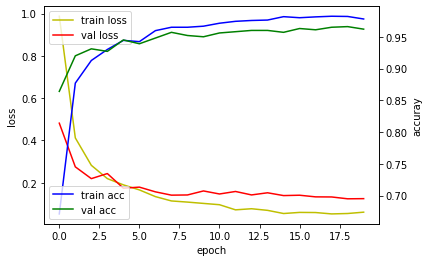

In [40]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=10)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [31]:
(OX_train, OY_train), (OX_test, OY_test) = fashion_mnist.load_data()
OX_test = OX_test[:1000]
OY_test = OY_test[:1000]
OY_test = to_categorical(OY_test)
OX_test_reshape = OX_test.reshape(1000, 28,28,1).astype('float32') / 255.0
test_loss, test_acc = model.evaluate(OX_test_reshape, OY_test, batch_size=10)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

predictions = model.predict(OX_test_reshape)

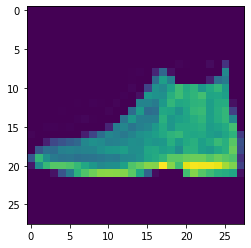

[4.0085270e-06 3.6855825e-05 8.7454861e-01 2.2450035e-08 2.1113383e-06
 5.5032682e-08 1.2540832e-01 4.0391819e-09 5.1815052e-10 1.0760682e-11]


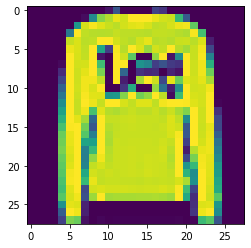

[2.8755713e-01 8.7711742e-06 7.8860261e-03 4.8981647e-06 1.6344758e-05
 2.4876761e-05 2.2813903e-01 2.9527390e-08 4.7636217e-01 6.3326507e-07]


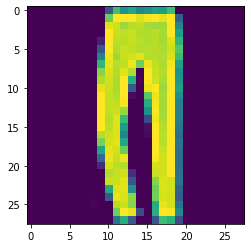

[9.9303114e-01 9.4003137e-04 1.3333312e-06 2.9260935e-08 2.5130477e-04
 5.9518444e-09 3.6041012e-05 1.0831004e-05 5.7294508e-03 2.6282716e-08]


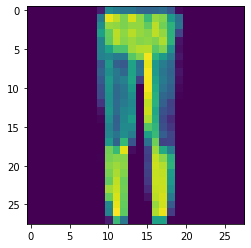

[3.2692731e-04 4.1822621e-01 6.5672244e-03 1.2004364e-04 7.1662703e-06
 2.6712064e-07 3.1480751e-05 6.2041057e-05 5.7465786e-01 8.3327711e-07]


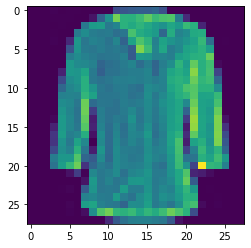

[5.6875300e-01 1.0895538e-03 1.1184089e-02 1.2849026e-03 4.9203254e-02
 9.3963480e-04 3.2758704e-01 1.7470439e-04 3.9334200e-02 4.4957685e-04]


In [32]:
for i in range(5):
    plt.imshow(OX_test[i])
    plt.show()
    print(predictions[i])

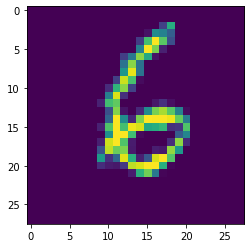

Original:  6
Predicted probabilities:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted Y:  6


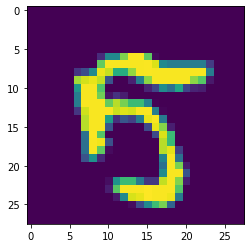

Original:  5
Predicted probabilities:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Predicted Y:  5


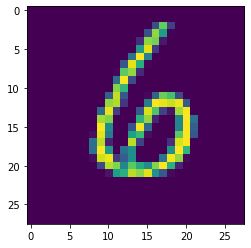

Original:  6
Predicted probabilities:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted Y:  6


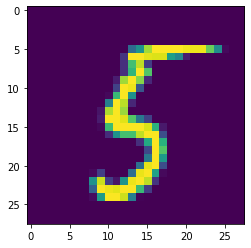

Original:  5
Predicted probabilities:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Predicted Y:  5


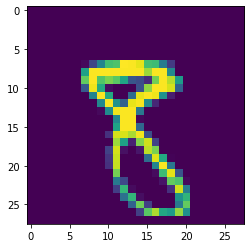

Original:  8
Predicted probabilities:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted Y:  8


In [33]:
X_check = X_test_org[2000:3000]
X_check = X_check.reshape(1000,28,28,1)
Xpredictions = model.predict(X_check)

for i in range(2000,2005):
    plt.imshow(X_test_org[i])
    plt.show()
    print ("Original: ",Y_test_org[i])
    print("Predicted probabilities: ",Xpredictions[i-2000])
    print("Predicted Y: ",np.argmax(Xpredictions[i-2000]))